# Кластерный анализ
## Исследовать задачу о кластерном анализе, изучить основные определения и методы кластеризации, показать работу основных методов кластеризации в MathLab и реализовать один из них самостоятельно

In [2]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets.samples_generator import make_blobs

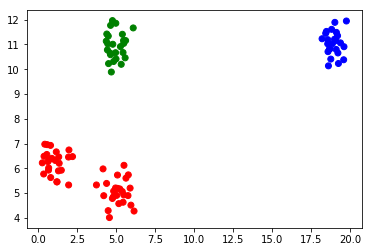

In [22]:
centers = [[5, 5],[19,11],[1,6],[5,11]]
X, labels_true = make_blobs(n_samples=100, centers=centers, cluster_std=0.5, random_state=0)
xv = [t[0] for t in X]
yv = [t[1] for t in X]
CST = KMeans(n_clusters = 3).fit(X)
colors = {0:'red',1:'blue',2:'green'}
colors = [colors[x] for x in CST.labels_]
plt.scatter(xv,yv,c = colors)

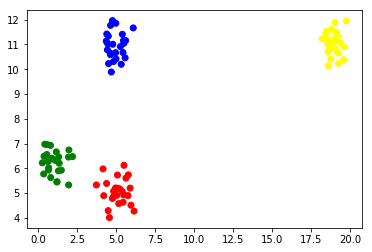

In [25]:
centers = [[5, 5],[19,11],[1,6],[5,11]]
X, labels_true = make_blobs(n_samples=100, centers=centers, cluster_std=0.5, random_state=0)
xv = [t[0] for t in X]
yv = [t[1] for t in X]
AFP = AffinityPropagation().fit(X)
colors = {0:'red',1:'blue',2:'green',3:'yellow'}
colors = [colors[x] for x in AFP.labels_]
plt.scatter(xv,yv,c = colors)

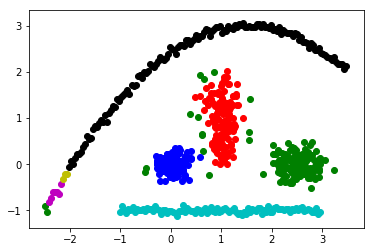

In [28]:
from itertools import cycle
from math import hypot
from numpy import random
import matplotlib.pyplot as plt

def dbscan_naive(P, eps, m, distance):

    NOISE = 0
    C = 0

    visited_points = set()
    clustered_points = set()
    clusters = {NOISE: []}

    def region_query(p):
        return [q for q in P if distance(p, q) < eps]

    def expand_cluster(p, neighbours):
        if C not in clusters:
            clusters[C] = []
        clusters[C].append(p)
        clustered_points.add(p)
        while neighbours:
            q = neighbours.pop()
            if q not in visited_points:
                visited_points.add(q)
                neighbourz = region_query(q)
                if len(neighbourz) > m:
                    neighbours.extend(neighbourz)
            if q not in clustered_points:
                clustered_points.add(q)
                clusters[C].append(q)
                if q in clusters[NOISE]:
                    clusters[NOISE].remove(q)

    for p in P:
        if p in visited_points:
            continue
        visited_points.add(p)
        neighbours = region_query(p)
        if len(neighbours) < m:
            clusters[NOISE].append(p)
        else:
            C += 1
            expand_cluster(p, neighbours)

    return clusters
P = [(random.randn()/6, random.randn()/6) for i in range(150)]
P.extend([(random.randn()/4 + 2.5, random.randn()/5) for i in range(150)])
P.extend([(random.randn()/5 + 1, random.randn()/2 + 1) for i in range(150)])
P.extend([(i/25 - 1, + random.randn()/20 - 1) for i in range(100)])
P.extend([(i/25 - 2.5, 3 - (i/50 - 2)**2 + random.randn()/20) for i in range(150)])
clusters = dbscan_naive(P, 0.2, 4, lambda x, y: hypot(x[0] - y[0], x[1] - y[1]))
for c, points in zip(cycle('gbgrcmyk'), clusters.values()):
    X = [p[0] for p in points]
    Y = [p[1] for p in points]
    plt.scatter(X, Y, c=c)
plt.show()